# What is the number of successfully finished  attacks in Western and Eastern Europe?

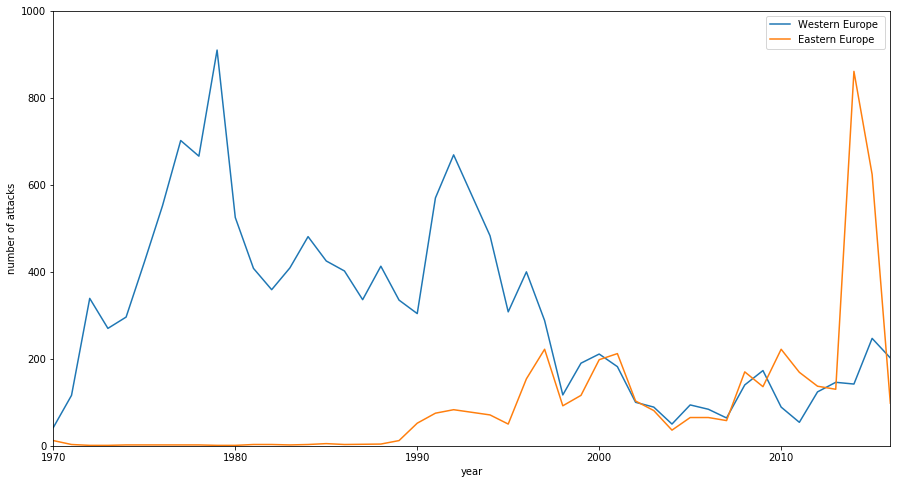

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)

region_dictionary = {8: 'Western Europe', 9: 'Eastern Europe'}

def multi_graph(result,result_list, xmin, xmax, ymin, ymax):
    fig2, ax2 = plt.subplots(figsize = (15,8))
    number = 8 
    for j in result_list:
        ax2.plot(j.index, j.eventid, label = '%s ' % region_dictionary[number] )
        number += 1

    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.xlabel('year')
    plt.ylabel('number of attacks')
    ax2.legend(loc = 0)


success_list = []


region_data = data[(data.region == 8)]
region_data_success = region_data[(region_data.success == 1)]
region_grouped_success = region_data_success.groupby('iyear').count()

    
success_list.append(region_grouped_success)

region_data = data[(data.region == 9)]
region_data_success = region_data[(region_data.success == 1)]
region_grouped_success = region_data_success.groupby('iyear').count()

    
success_list.append(region_grouped_success)

multi_graph('Successes',success_list, 1970, 2016, 0, 1000)


plt.show()

# Which season terrorists like the most?

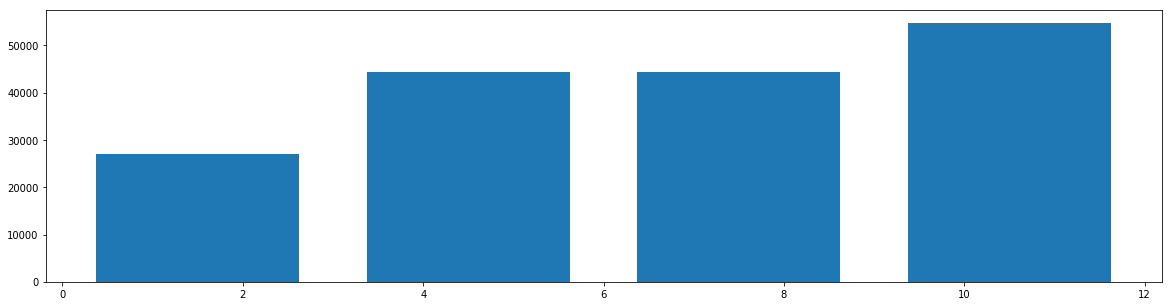

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)
month=df['imonth']
#assumption: 1st-3rd month - winter, 4th-6th - spring, 7th-9th - summer, 10th-12th - fall, not specific dates
plt.figure(figsize=(20,5))
plt.hist(month, rwidth=0.75, bins=4)
plt.show()
# result: the most popular season is autumn

# How many terrorist attacks take place in each year?

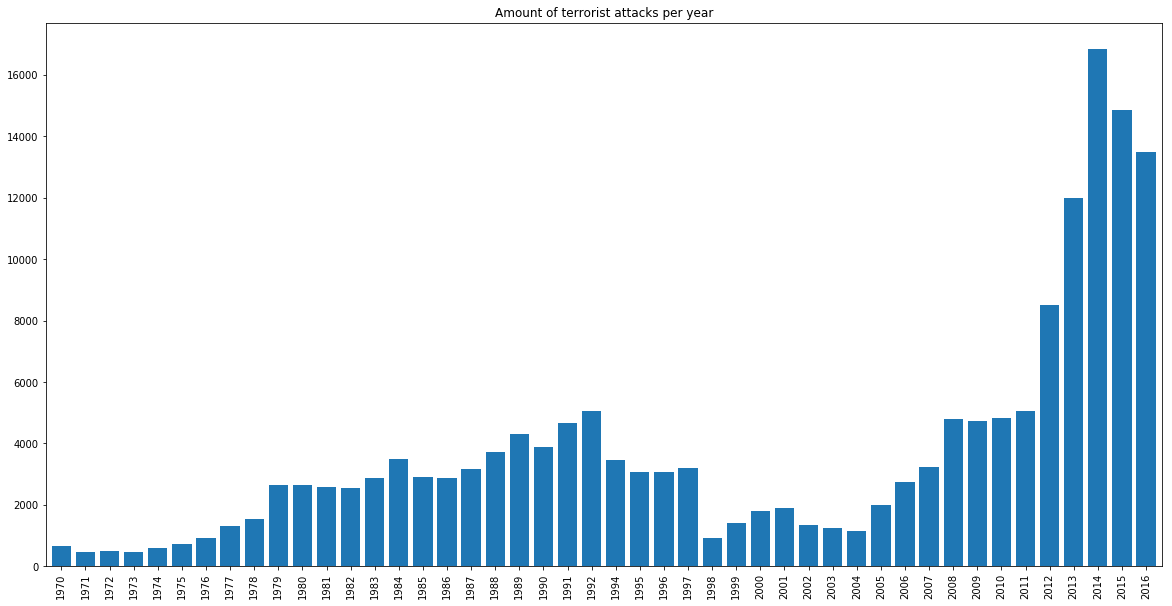

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



df = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)

arplot = pd.value_counts(df['iyear']).sort_index().plot.bar(width=0.8, figsize=(20, 10), title="Amount of terrorist attacks per year")

plt.show()

#result: nope

# Where terrorist attacks take place?

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)
#place=df['region_txt']
#plt.figure(figsize=(20,5))
#plt.hist(place, rwidth=1, bins=12)
#plt.show()
#result: the most popular place is middle east&north africa


from mpl_toolkits.basemap import Basemap
from matplotlib import cm
%matplotlib inline

west, south, east, north = -74.26, 40.50, -73.70, 40.92
x=df['longitude']
lat=df['latitude']
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(x, lat)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r);

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'